# Basic Concepts

This tutorial is an introduction to medicinal chemistry molecular filtering. It will show that applying thoes type of filters and rules systematically and blindly is often not a good idea. While powerful such filtering technics must always be carefully assesed and prototyped before using systematically and at large scale.


In [ ]:
%load_ext autoreload
%autoreload 2

In [62]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

import datamol as dm
import pandas as pd

import medchem as mc


## Commercial drugs does not always pass common filters

_NOTE(hadim): show that some drugs pass and some other does not pass the filters. It's important to consider the whole pipeline. At early stage, filters and rules might make sense and during LO and further, small critical modifications will make the drug to fail on certain filters that used to work before_


In [12]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/datamol-io/datamol/more_datasets/datamol/data/chembl_drugs.csv"
)
# data = dm.data.chembl_drugs()  # wait for https://github.com/datamol-io/datamol/pull/208

data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply basic rules
data["rule_of_five"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_five)
data["rule_of_ghose"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_ghose)
data["rule_of_veber"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_veber)
data["rule_of_zinc"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_zinc)

# Apply some default medchem filters
data["alerts_BMS"] = mc.functional.alert_filter(
    mols=data["mol"].tolist(),
    alerts=["BMS"],
    n_jobs=-1,
    progress=True,
    return_idx=False,
)
data["alerts_PAINS"] = mc.functional.alert_filter(
    mols=data["mol"].tolist(),
    alerts=["PAINS"],
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

data["alerts_SureChEMBL"] = mc.functional.alert_filter(
    mols=data["mol"].tolist(),
    alerts=["SureChEMBL"],
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

data["filters_NIBR"] = mc.functional.nibr_filter(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

data["filter_complexity"] = mc.functional.complexity_filter(
    mols=data["mol"].tolist(),
    complexity_metric="bertz",
    threshold_stats_file="zinc_15_available",
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

data["filter_bredt"] = mc.functional.bredt_filter(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

data["filter_molecular_graph"] = mc.functional.molecular_graph_filter(
    mols=data["mol"].tolist(),
    max_severity=5,
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

data["filter_lilly_demerit"] = mc.functional.lilly_demerit_filter(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    return_idx=False,
)


Common alerts filtering:   0%|          | 0/1935 [00:00<?, ?it/s]

Common alerts filtering:   0%|          | 0/1935 [00:00<?, ?it/s]

Common alerts filtering:   0%|          | 0/1935 [00:00<?, ?it/s]

NIBR filtering:   0%|          | 0/1935 [00:00<?, ?it/s]

Complexity Evaluation:   0%|          | 0/1935 [00:00<?, ?it/s]

To mol:   0%|          | 0/1935 [00:00<?, ?it/s]

Filtering with catalogs:   0%|          | 0/19 [00:00<?, ?it/s]

Match:   0%|          | 0/1935 [00:00<?, ?it/s]

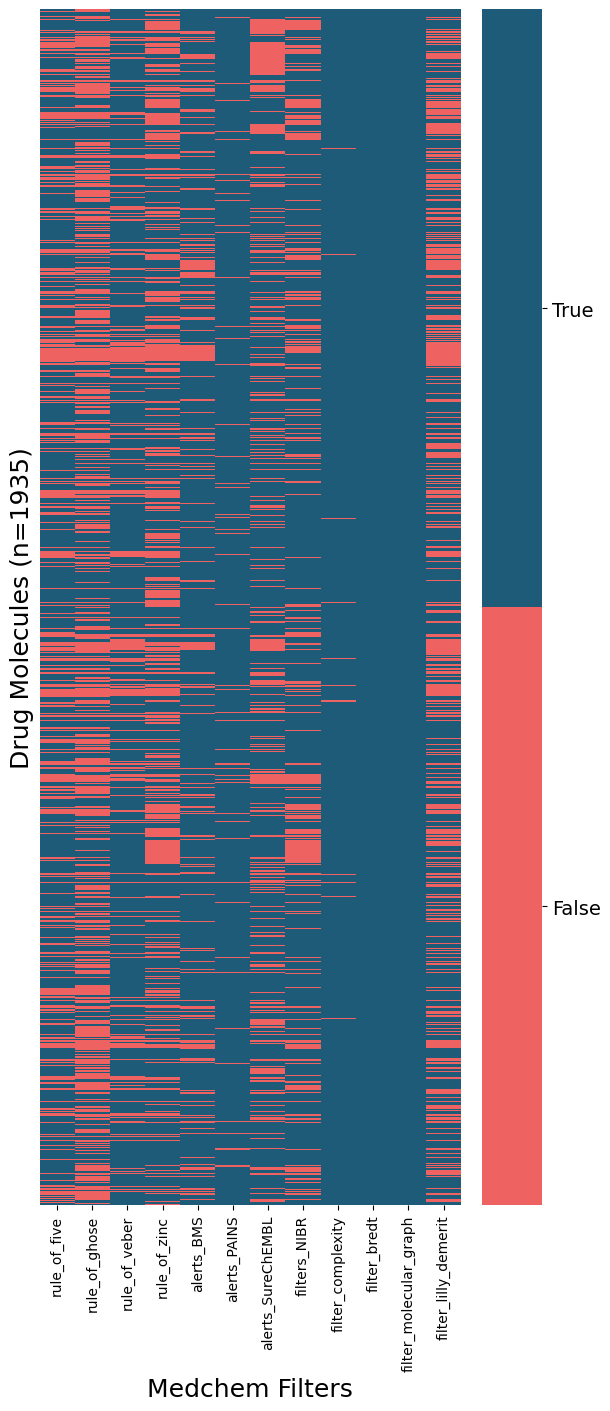

In [61]:
filter_columns = [
    "rule_of_five",
    "rule_of_ghose",
    "rule_of_veber",
    "rule_of_zinc",
    "alerts_BMS",
    "alerts_PAINS",
    "alerts_SureChEMBL",
    "filters_NIBR",
    "filter_complexity",
    "filter_bredt",
    "filter_molecular_graph",
    "filter_lilly_demerit",
]


f, ax = plt.subplots(figsize=(6, 14), constrained_layout=True)

cmap = matplotlib.colors.ListedColormap(["#EF6262", "#1D5B79"], None)

sns.heatmap(
    data[filter_columns],
    annot=False,
    ax=ax,
    xticklabels=True,  # type: ignore
    yticklabels=False,  # type: ignore
    cbar=True,
    cmap=cmap,
)
# sns.heatmap(data[filter_columns], annot=False, ax=ax, xticklabels=False, yticklabels=False)

ax.collections[0].colorbar.set_ticks([0.25, 0.75])
ax.collections[0].colorbar.set_ticklabels([False, True], fontsize=14)

ax.set_ylabel(f"Drug Molecules (n={len(data)})", fontsize=18)
_ = ax.set_xlabel("Medchem Filters", fontsize=18)


## New drugs versus old drugs

_NOTE(hadim): shows new drugs less likely to pass common filters (cite a paper if possible)_


## General Guidelines

_NOTE(hadim): from Manu "I think there is some ‘guideline’ about the rules in a csv to understand which rules apply to which class of molecules or stage of discovery. It’s mostly heuristic, but could be worth checking properly and highlight to help people getting started."_


In [10]:
mc.structural.CommonAlertsFilters.list_default_available_alerts()


,rule_set_name,smarts,catalog_description,rule_set,source
0,Glaxo,55,Glaxo Wellcome Hard filters,1,ChEMBL
1,Dundee,105,University of Dundee NTD Screening Library Fil...,2,ChEMBL
2,BMS,180,Bristol-Myers Squibb HTS Deck filters,3,ChEMBL
3,PAINS,481,PAINS filters,4,ChEMBL
4,SureChEMBL,166,SureChEMBL Non-MedChem Friendly SMARTS,5,ChEMBL
5,MLSMR,116,NIH MLSMR Excluded Functionality filters (MLSMR),6,ChEMBL
6,Inpharmatica,91,Unwanted fragments derived by Inpharmatica Ltd.,7,ChEMBL
7,LINT,57,Pfizer lint filters (lint),8,ChEMBL
8,Alarm-NMR,75,Reactive False Positives in Biochemical Screen...,9,Litterature
9,AlphaScreen-Hitters,6,Structural filters for compounds that may be a...,10,Litterature


## New drugs versus old drugs

_NOTE(hadim): shows new drugs less likely to pass common filters (cite a paper if possible)_


## Case study: pro-drugs

In this example, an example of a pro-drug (Atenovofir for HIV) is shown. _ADD MORE ABOUT THE STORY HERE_


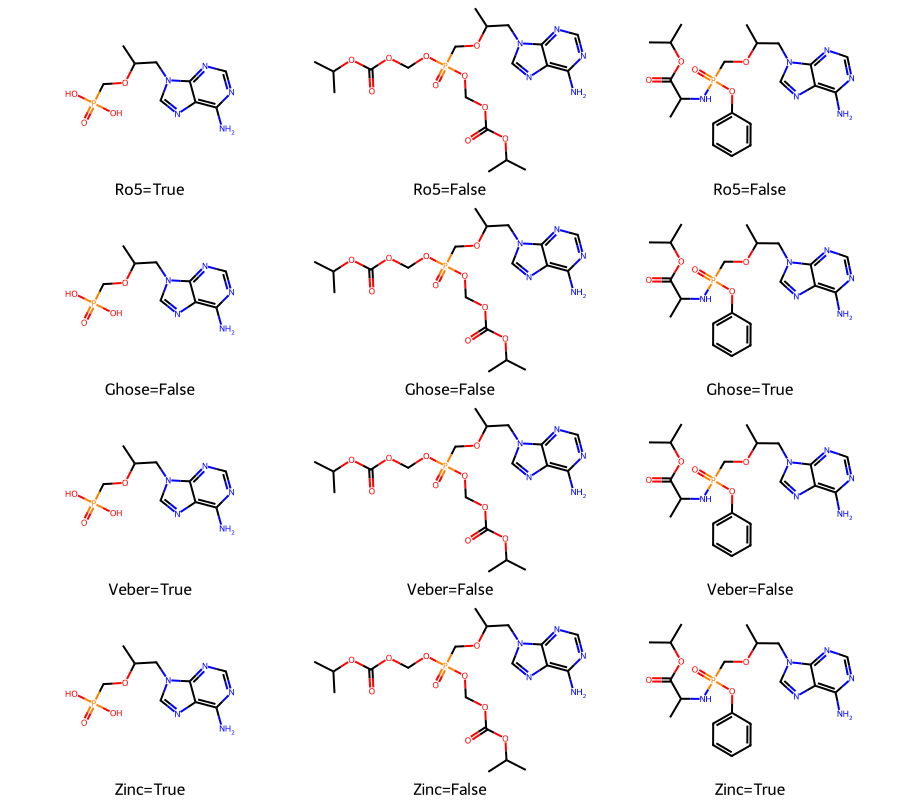

In [3]:
# Build the dataset
smiles_list = [
    "NC1=C2C(N(CC(OCP(O)(O)=O)C)C=N2)=NC=N1",
    "NC1=C2C(N(CC(OCP(OCOC(OC(C)C)=O)(OCOC(OC(C)C)=O)=O)C)C=N2)=NC=N1",
    "NC1=C2C(N(CC(OCP(OC3=CC=CC=C3)(NC(C)C(OC(C)C)=O)=O)C)C=N2)=NC=N1",
]

data = pd.DataFrame({"smiles": smiles_list})
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply basic rules
data["rule_of_five"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_five)
data["rule_of_ghose"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_ghose)
data["rule_of_veber"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_veber)
data["rule_of_zinc"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_zinc)

# Display the molecules
legends = []
legends += [f"Ro5={v}" for v in data["rule_of_five"]]
legends += [f"Ghose={v}" for v in data["rule_of_ghose"]]
legends += [f"Veber={v}" for v in data["rule_of_veber"]]
legends += [f"Zinc={v}" for v in data["rule_of_zinc"]]

mol_list = data["mol"].tolist() * 4

dm.to_image(mol_list, legends=legends, n_cols=3, mol_size=(300, 200))


_NOTE(hadim): DISCUSS THE RESULTS._
